In [1]:
import pandas as pd

In [2]:
df_or= pd.read_excel("swat_data.xlsx")
df = df_or

In [3]:
print("Dimensiones del dataset:,df.shape")
df.head()


Dimensiones del dataset:,df.shape


,t_stamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,State
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [4]:
df['State'] = df['State'].replace('A ttack','Attack')
df.rename(columns={' t_stamp': 't_stamp'}, inplace=True)
print(df['State'].value_counts())


State
Normal    395298
Attack     54621
Name: count, dtype: int64


In [5]:
t_stamp = df['t_stamp']
state = df['State']

# Eliminar 't_stamp' y 'State' del DataFrame original
df.drop(columns=['t_stamp', 'State'], inplace=True)

# Verificar el cambio
print("Columnas restantes en el DataFrame:")
print(df.columns)

# Verificar las primeras filas de las nuevas variables
print("\nPrimeras filas de t_stamp y State:")
print(t_stamp.head())
print(state.head())

Columnas restantes en el DataFrame:
Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603'],
      dtype='object')

Primeras filas de t_stamp y State:
0     28/12/2015 10:00:00 AM
1     28/12/2015 10:00:01 AM
2     28/12/2015 10:00:02 AM
3     28/12/2015 10:00:03 AM
4     28/12/2015 10:00:04 AM
Name: t_stamp, dtype: object
0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: State, dtype: object


In [6]:
conteo_estado = state.value_counts()
print("Conteo de 'Normal' y 'Attack' en 'state':")
print(conteo_estado)

Conteo de 'Normal' y 'Attack' en 'state':
State
Normal    395298
Attack     54621
Name: count, dtype: int64


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características (X) y la columna 'State' para etiquetas (y)
X = df  # Características (todos los sensores y actuadores)
y = state.map({'Normal': 0, 'Attack': 1})  # Etiquetas: Normal (0) y Attack (1) para evaluar el modelo luego

# Normalizar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para que conserve las columnas originales
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Datos normalizados:")
print(X_scaled_df.head())

Datos normalizados:
     FIT101    LIT101   MV101  P101  P102    AIT201    AIT202    AIT203  \
0  0.879322  0.452962     1.0   1.0   0.0  0.942783  0.876785  0.436773   
1  0.886285  0.453015     1.0   1.0   0.0  0.942783  0.876785  0.436773   
2  0.901833  0.452962     1.0   1.0   0.0  0.942783  0.876081  0.436773   
3  0.918195  0.453122     1.0   1.0   0.0  0.942783  0.876081  0.436773   
4  0.930842  0.453816     1.0   1.0   0.0  0.942783  0.876081  0.436773   

     FIT201   MV201  ...    FIT504  P501  P502    PIT501    PIT502    PIT503  \
0  0.865044     1.0  ...  0.987464   1.0   0.0  0.985802  0.837398  0.987359   
1  0.865044     1.0  ...  0.987464   1.0   0.0  0.985802  0.837398  0.987783   
2  0.863956     1.0  ...  0.990135   1.0   0.0  0.985868  0.837398  0.987783   
3  0.863956     1.0  ...  0.990135   1.0   0.0  0.985868  0.837398  0.987444   
4  0.864228     1.0  ...  0.990135   1.0   0.0  0.985868  0.837398  0.986850   

     FIT601  P601  P602  P603  
0  0.000071   0.

In [9]:
!pip install umap-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


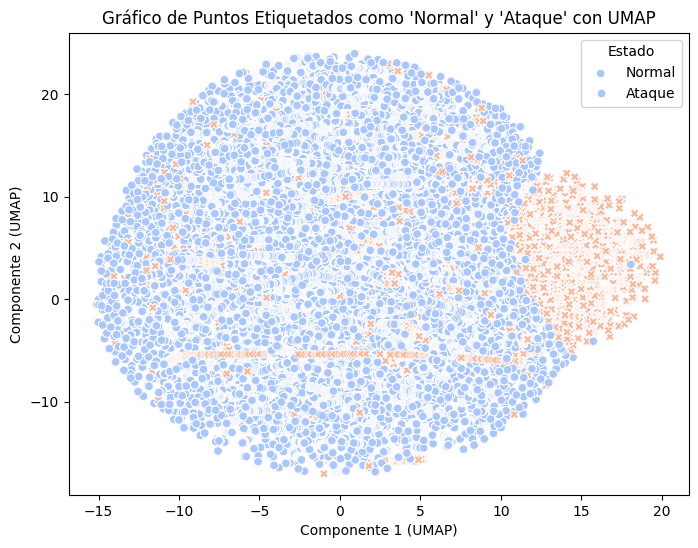

In [13]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar UMAP para reducir la dimensionalidad a 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled_df)  # X_scaled_df es el conjunto de datos normalizados

# Grafica los puntos en el espacio reducido a 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='coolwarm', style=y, markers=['o', 'X'])
plt.title("Gráfico de Puntos Etiquetados como 'Normal' y 'Ataque' con UMAP")
plt.xlabel('Componente 1 (UMAP)')
plt.ylabel('Componente 2 (UMAP)')
plt.legend(title='Estado', labels=['Normal', 'Ataque'])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def initialize_kmeans_plus_plus(X, k):
    n_samples = X.shape[0]
    centroids = np.empty((k, X.shape[1]))
    
    # Primer centro aleatorio
    idx = np.random.randint(n_samples)
    centroids[0] = X[idx]
    
    for i in range(1, k):
        # Distancia mínima a cualquier centro existente
        dists = np.min(np.linalg.norm(X[:, np.newaxis] - centroids[:i], axis=2)**2, axis=1)
        
        # Proporcional a la distancia cuadrada
        probs = dists / np.sum(dists)
        cumulative_probs = np.cumsum(probs)
        r = np.random.rand()
        next_idx = np.searchsorted(cumulative_probs, r)
        centroids[i] = X[next_idx]
    
    return centroids

def assign_clusters(X, centroids):
    # Calcula la matriz de distancias
    dists = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(dists, axis=1)

def kmeans_custom(X, k=2, max_iter=100, tol=1e-4):
    centroids = initialize_kmeans_plus_plus(X, k)
    
    for iteration in range(max_iter):
        labels = assign_clusters(X, centroids)
        
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])
        
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids
    
    return labels, centroids

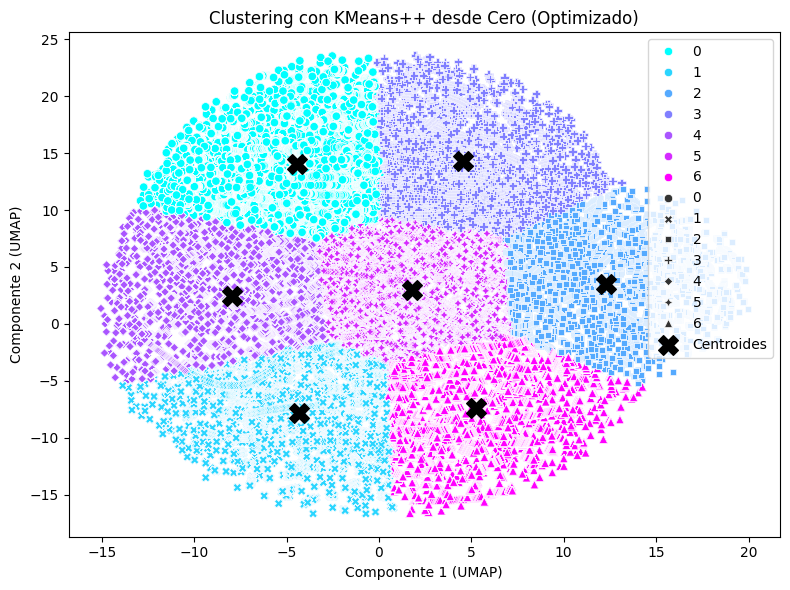

In [ ]:
# Ejecuta clustering
y_pred_custom, centroids_custom = kmeans_custom(X_umap, k=7)

# Visualizar resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_pred_custom, palette='cool', style=y_pred_custom)
plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.title("Clustering con KMeans++ desde Cero (Optimizado)")
plt.xlabel("Componente 1 (UMAP)")
plt.ylabel("Componente 2 (UMAP)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    confusion_matrix,
    classification_report
)
import numpy as np

def calcular_purity(y_true, y_pred):
    contingency = confusion_matrix(y_true, y_pred)
    return np.sum(np.max(contingency, axis=0)) / np.sum(contingency)

def evaluar_clustering(X_umap, labels, y):
    
    print("\n MÉTRICAS SUPERVISADAS (usando `y`):")
    print(f"  • Adjusted Rand Index (ARI):       {adjusted_rand_score(y, labels):.4f}")
    print(f"  • Purity:                           {calcular_purity(y, labels):.4f}")
    
    print("\n MATRIZ DE CONFUSIÓN Y REPORTE:")
    print(confusion_matrix(y, labels))
    print(classification_report(y, labels, digits=4))

In [66]:
def unir_clusters_salvo_anomalias(labels, cluster_anomalo=2):
    # Todo excepto el clúster anómalo lo etiquetamos como 0 (normal)
    labels_binarios = np.where(labels == cluster_anomalo, 1, 0)
    return labels_binarios

labels_bin = unir_clusters_salvo_anomalias(y_pred_custom, cluster_anomalo=2)
evaluar_clustering(X_umap, labels_bin, y)


🧩 MÉTRICAS SUPERVISADAS (usando `y`):
  • Adjusted Rand Index (ARI):       0.4822
  • Purity:                           0.9025

📈 MATRIZ DE CONFUSIÓN Y REPORTE:
[[372234  23064]
 [ 20815  33806]]
              precision    recall  f1-score   support

           0     0.9470    0.9417    0.9443    395298
           1     0.5944    0.6189    0.6064     54621

    accuracy                         0.9025    449919
   macro avg     0.7707    0.7803    0.7754    449919
weighted avg     0.9042    0.9025    0.9033    449919

